In [1]:
colab=1
import os

if colab:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  working_dir='/content/drive/My Drive/Reinforcement Learning Project/Code/'
  os.chdir(working_dir)

Mounted at /content/drive


In [2]:
from tensorflow.python.framework.ops import disable_eager_execution
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)

from A2C_Agent import *
from env import *
from Train_Test import *

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [3]:
!pip install yfinance -U -q
import yfinance as yf

     |████████████████████████████████| 6.3MB 17.3MB/s 


## 1. Import HFT datasets

Text(0.5, 1.0, 'AAPL ')

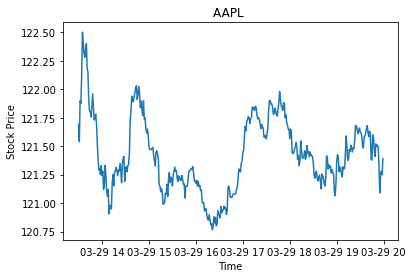

In [4]:
aapl_df = pd.read_csv("Data/aapl.csv",index_col=0, parse_dates=True)
plt.plot(aapl_df['Close'])
plt.ylabel("Stock Price")
plt.xlabel("Time")
plt.title("AAPL ")

Text(0.5, 1.0, 'GOOG')

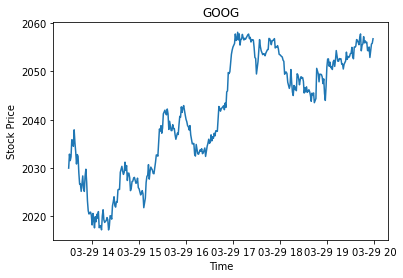

In [5]:
goog_df = pd.read_csv("Data/goog.csv",index_col=0, parse_dates=True)
plt.plot(goog_df['Close'])
plt.ylabel("Stock Price")
plt.xlabel("Time")
plt.title("GOOG")

In [6]:
tickerSymbol = 'MRNA'
tickerData = yf.Ticker(tickerSymbol)
start_time="2021-04-26"
end_time="2021-04-29"
mrna_df = tickerData.history(tickers = tickerSymbol, interval = "1m",start=start_time, end=end_time)
mrna_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2021-04-26 09:30:00-04:00,171.789993,172.289993,170.429993,171.715897,320662,0,0
2021-04-26 09:31:00-04:00,171.949997,171.949997,170.770004,171.067993,43773,0,0
2021-04-26 09:32:00-04:00,171.189194,171.645996,170.220001,170.550598,53637,0,0
2021-04-26 09:33:00-04:00,170.654999,170.671494,169.420105,169.420105,89914,0,0
2021-04-26 09:34:00-04:00,169.551804,169.740005,168.880005,169.582703,81844,0,0
...,...,...,...,...,...,...,...
2021-04-28 15:55:00-04:00,178.610001,178.860001,178.578201,178.639999,47203,0,0
2021-04-28 15:56:00-04:00,178.600006,178.789993,178.477997,178.654999,28837,0,0
2021-04-28 15:57:00-04:00,178.610001,178.830002,178.500000,178.630005,50477,0,0


Text(0.5, 1.0, 'Moderna')

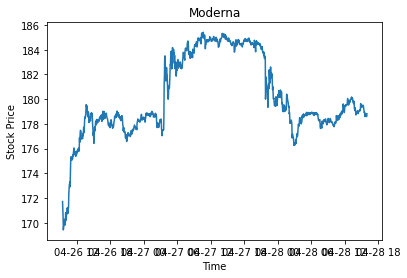

In [7]:
plt.plot(pd.date_range(mrna_df.index[0], mrna_df.index[-1],len(mrna_df)), mrna_df['Close'])
plt.ylabel("Stock Price")
plt.xlabel("Time")
plt.title("Moderna")

In [8]:
tickerSymbol = 'PFE'
tickerData = yf.Ticker(tickerSymbol)
start_time="2021-04-26"
end_time="2021-05-03"
pfe_df = tickerData.history(tickers = tickerSymbol, interval = "1m",start=start_time, end=end_time)
pfe_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2021-04-26 09:30:00-04:00,38.730000,38.740002,38.669998,38.700001,848506,0,0
2021-04-26 09:31:00-04:00,38.689999,38.707401,38.660000,38.676998,83680,0,0
2021-04-26 09:32:00-04:00,38.680000,38.696400,38.619999,38.619999,103555,0,0
2021-04-26 09:33:00-04:00,38.625000,38.639999,38.581001,38.604500,115806,0,0
2021-04-26 09:34:00-04:00,38.605000,38.619999,38.575001,38.579899,74331,0,0
...,...,...,...,...,...,...,...
2021-04-30 15:55:00-04:00,38.610001,38.630001,38.599998,38.619999,234919,0,0
2021-04-30 15:56:00-04:00,38.619999,38.639999,38.605000,38.610001,256240,0,0
2021-04-30 15:57:00-04:00,38.610001,38.630001,38.599998,38.615002,336306,0,0


Text(0.5, 1.0, 'Pfizer')

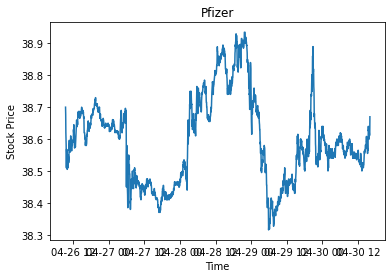

In [9]:
plt.plot(pd.date_range(pfe_df.index[0], pfe_df.index[-1],len(pfe_df)), pfe_df['Close'])
plt.ylabel("Stock Price")
plt.xlabel("Time")
plt.title("Pfizer")

In [10]:
tickerSymbol = 'JNJ'
tickerData = yf.Ticker(tickerSymbol)
start_time="2021-04-26"
end_time="2021-05-03"
jnj_df = tickerData.history(tickers = tickerSymbol, interval = "1m",start=start_time, end=end_time)
jnj_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2021-04-26 09:30:00-04:00,165.210007,165.410004,165.020004,165.080002,310452,0,0
2021-04-26 09:31:00-04:00,165.050003,165.149994,164.850006,164.919998,22940,0,0
2021-04-26 09:32:00-04:00,164.860001,164.970001,164.410004,164.569901,35057,0,0
2021-04-26 09:33:00-04:00,164.550003,164.690002,164.270004,164.563904,34057,0,0
2021-04-26 09:34:00-04:00,164.543198,164.639999,164.500000,164.509995,20419,0,0
...,...,...,...,...,...,...,...
2021-04-30 15:55:00-04:00,162.889999,162.967499,162.750000,162.779999,160189,0,0
2021-04-30 15:56:00-04:00,162.779999,162.800003,162.710007,162.740005,137028,0,0
2021-04-30 15:57:00-04:00,162.729996,162.750000,162.588593,162.645004,141578,0,0


Text(0.5, 1.0, 'Johnson & Johnson')

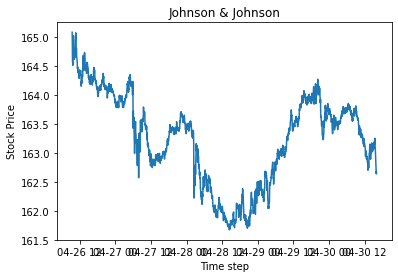

In [11]:
plt.plot(pd.date_range(jnj_df.index[0], jnj_df.index[-1],len(jnj_df)), jnj_df['Close'])
plt.ylabel("Stock Price")
plt.xlabel("Time step")
plt.title("Johnson & Johnson")

In [12]:
jnj_df.to_csv('Data/jnj.csv')

In [13]:
mrna_df.to_csv('Data/mrna.csv')

In [14]:
pfe_df.to_csv('Data/pfe.csv')

## 2. Train

In [15]:
Train(mrna_df[:780], 200, 'Model/actor_critic_mrna', 0.0005)

KeyboardInterrupt: ignored

Epoch 000 | pnl -0.38
Epoch 001 | pnl 1.60
Epoch 002 | pnl 0.34
Epoch 003 | pnl 0.12
Epoch 004 | pnl 0.39
Epoch 005 | pnl 0.50
Epoch 006 | pnl 0.25
Epoch 007 | pnl 0.30
Epoch 008 | pnl 0.41
Epoch 009 | pnl 0.47
Epoch 010 | pnl 0.36
Epoch 011 | pnl 0.18
Epoch 012 | pnl 0.47
Epoch 013 | pnl 0.43
Epoch 014 | pnl 0.42
Epoch 015 | pnl 0.34
Epoch 016 | pnl 0.51
Epoch 017 | pnl -0.03
Epoch 018 | pnl 0.04
Epoch 019 | pnl 0.30
Epoch 020 | pnl 0.47
Epoch 021 | pnl 1.11
Epoch 022 | pnl 0.62
Epoch 023 | pnl 0.43
Epoch 024 | pnl 0.61
Epoch 025 | pnl 0.32
Epoch 026 | pnl -0.09
Epoch 027 | pnl 0.34
Epoch 028 | pnl 0.27
Epoch 029 | pnl 0.10
Epoch 030 | pnl 0.34
Epoch 031 | pnl 0.28
Epoch 032 | pnl 0.22
Epoch 033 | pnl -0.04
Epoch 034 | pnl 0.32
Epoch 035 | pnl 0.07
Epoch 036 | pnl 0.06
Epoch 037 | pnl 0.02
Epoch 038 | pnl 0.01
Epoch 039 | pnl 0.60
Epoch 040 | pnl -0.01
Epoch 041 | pnl -0.16
Epoch 042 | pnl 0.23
Epoch 043 | pnl -0.83
Epoch 044 | pnl -0.58
Epoch 045 | pnl 0.03
Epoch 046 | pnl 0.26
Epoch

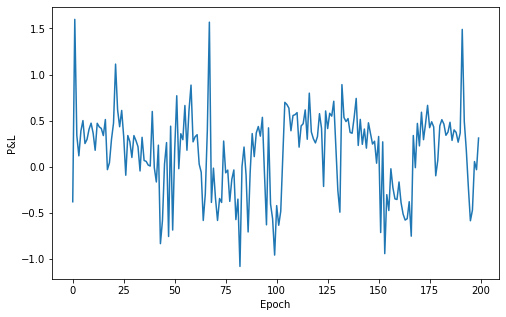

In [ ]:
Train(pfe_df[:1170], 200, 'Model/actor_critic_pfe', 0.001)

Epoch 000 | pnl -3.75
Epoch 001 | pnl -5.53
Epoch 002 | pnl 0.26
Epoch 003 | pnl 4.22
Epoch 004 | pnl 3.05
Epoch 005 | pnl -5.96
Epoch 006 | pnl -0.97
Epoch 007 | pnl -5.09
Epoch 008 | pnl -5.32
Epoch 009 | pnl -6.39
Epoch 010 | pnl -4.72
Epoch 011 | pnl -4.51
Epoch 012 | pnl -4.45
Epoch 013 | pnl -6.25
Epoch 014 | pnl -5.70
Epoch 015 | pnl -5.40
Epoch 016 | pnl -0.84
Epoch 017 | pnl -0.90
Epoch 018 | pnl -4.39
Epoch 019 | pnl -3.52
Epoch 020 | pnl -2.16
Epoch 021 | pnl -5.29
Epoch 022 | pnl -6.26
Epoch 023 | pnl -5.75
Epoch 024 | pnl -5.29
Epoch 025 | pnl -5.92
Epoch 026 | pnl -6.53
Epoch 027 | pnl -5.68
Epoch 028 | pnl 5.70
Epoch 029 | pnl -3.73
Epoch 030 | pnl 3.58
Epoch 031 | pnl 4.76
Epoch 032 | pnl 0.68
Epoch 033 | pnl 2.49
Epoch 034 | pnl 4.95
Epoch 035 | pnl 4.36
Epoch 036 | pnl 5.32
Epoch 037 | pnl 7.17
Epoch 038 | pnl -0.92
Epoch 039 | pnl 2.00
Epoch 040 | pnl -3.84
Epoch 041 | pnl -3.82
Epoch 042 | pnl -3.56
Epoch 043 | pnl 1.10
Epoch 044 | pnl 2.63
Epoch 045 | pnl -5.15
Epo

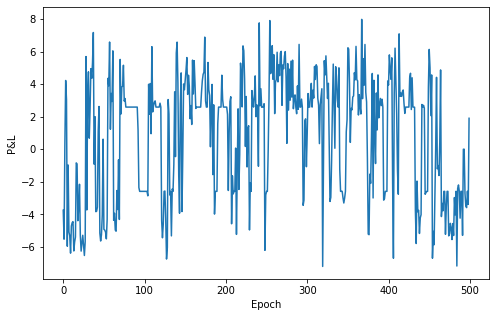

In [ ]:
Train(jnj_df[:1170], 500, 'Model/actor_critic_jnj', 0.001)

Epoch 000 | pnl -0.58
Epoch 001 | pnl -1.88
Epoch 002 | pnl 0.25
Epoch 003 | pnl 0.88
Epoch 004 | pnl -2.41
Epoch 005 | pnl -2.21
Epoch 006 | pnl 0.39
Epoch 007 | pnl 0.06
Epoch 008 | pnl -1.41
Epoch 009 | pnl 1.46
Epoch 010 | pnl -1.42
Epoch 011 | pnl -1.32
Epoch 012 | pnl -0.41
Epoch 013 | pnl -1.53
Epoch 014 | pnl -0.81
Epoch 015 | pnl 1.27
Epoch 016 | pnl -0.14
Epoch 017 | pnl 0.17
Epoch 018 | pnl 0.55
Epoch 019 | pnl -1.45
Epoch 020 | pnl -2.17
Epoch 021 | pnl 0.54
Epoch 022 | pnl 1.22
Epoch 023 | pnl -1.12
Epoch 024 | pnl -0.89
Epoch 025 | pnl -1.41
Epoch 026 | pnl -1.50
Epoch 027 | pnl -1.15
Epoch 028 | pnl 0.90
Epoch 029 | pnl -0.74
Epoch 030 | pnl -1.58
Epoch 031 | pnl -0.51
Epoch 032 | pnl -0.70
Epoch 033 | pnl -0.91
Epoch 034 | pnl -0.90
Epoch 035 | pnl -0.31
Epoch 036 | pnl -0.58
Epoch 037 | pnl -1.23
Epoch 038 | pnl 0.76
Epoch 039 | pnl 0.74
Epoch 040 | pnl 2.00
Epoch 041 | pnl 0.85
Epoch 042 | pnl 2.49
Epoch 043 | pnl 0.41
Epoch 044 | pnl 0.52
Epoch 045 | pnl 0.06
Epoch 0

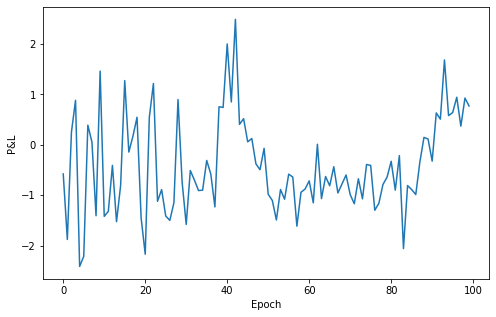

In [ ]:
Train(jnj_df[:390], 100, 'Model/actor_critic_jnj_2', 0.001)

## 3. Evaluate

... loading models ...
# 0 action 1 pos: 0 reward: 0.000 balance: 0.000 pnl: 0.000
# 1 action 0 pos: -1 reward: 0.000 balance: 121.899 pnl: 0.000
# 2 action 1 pos: -1 reward: 0.024 balance: 121.899 pnl: 0.024
# 3 action 0 pos: -1 reward: -0.221 balance: 121.899 pnl: -0.221
# 4 action 0 pos: -1 reward: -0.601 balance: 121.899 pnl: -0.601
# 5 action 2 pos: -1 reward: -0.501 balance: 121.899 pnl: -0.501
# 6 action 0 pos: 0 reward: -0.421 balance: -0.922 pnl: -0.922
# 7 action 1 pos: 0 reward: -0.421 balance: -0.922 pnl: -0.922
# 8 action 0 pos: -1 reward: -0.421 balance: 121.428 pnl: -0.922
# 9 action 1 pos: -1 reward: -0.050 balance: 121.428 pnl: -0.972
# 10 action 2 pos: -1 reward: 0.170 balance: 121.428 pnl: -0.752
# 11 action 0 pos: 0 reward: 0.200 balance: -0.552 pnl: -0.552
# 12 action 0 pos: 0 reward: 0.200 balance: -0.552 pnl: -0.552
# 13 action 0 pos: 0 reward: 0.200 balance: -0.552 pnl: -0.552
# 14 action 0 pos: 0 reward: 0.200 balance: -0.552 pnl: -0.552
# 15 action 0 pos: 0 re

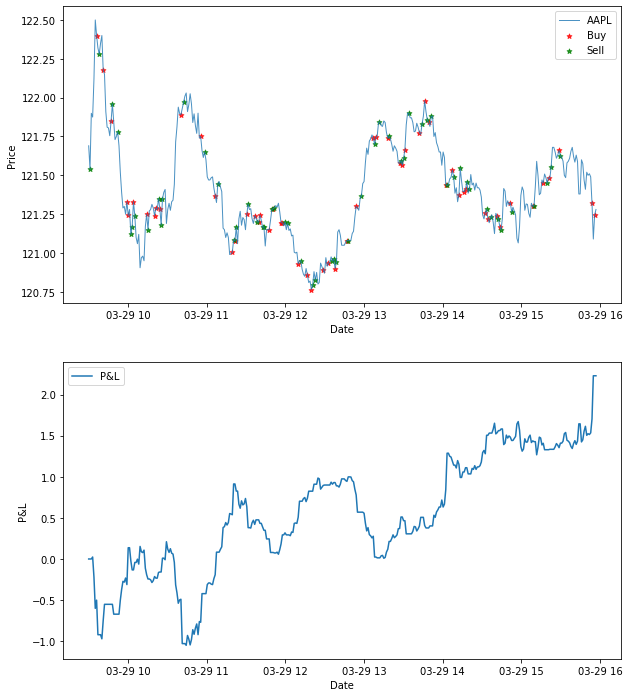

2.340057373046946


In [ ]:
Test(aapl_df, 'AAPL', 0.005, 'Model/actor_critic_goog')

... loading models ...
# 0 action 1 pos: 0 reward: 0.000 balance: 0.000 pnl: 0.000
# 1 action 1 pos: -1 reward: 0.000 balance: 181.780 pnl: 0.000
# 2 action 1 pos: -1 reward: 0.310 balance: 181.780 pnl: 0.310
# 3 action 1 pos: -1 reward: 0.700 balance: 181.780 pnl: 0.700
# 4 action 1 pos: -1 reward: 0.770 balance: 181.780 pnl: 0.770
# 5 action 1 pos: -1 reward: 1.050 balance: 181.780 pnl: 1.050
# 6 action 1 pos: -1 reward: 0.861 balance: 181.780 pnl: 0.861
# 7 action 1 pos: -1 reward: 0.981 balance: 181.780 pnl: 0.981
# 8 action 1 pos: -1 reward: 2.440 balance: 181.780 pnl: 2.440
# 9 action 1 pos: -1 reward: 1.790 balance: 181.780 pnl: 1.790
# 10 action 1 pos: -1 reward: 0.606 balance: 181.780 pnl: 0.606
# 11 action 1 pos: -1 reward: 0.550 balance: 181.780 pnl: 0.550
# 12 action 1 pos: -1 reward: 0.919 balance: 181.780 pnl: 0.919
# 13 action 1 pos: -1 reward: -0.590 balance: 181.780 pnl: -0.590
# 14 action 1 pos: -1 reward: -0.267 balance: 181.780 pnl: -0.267
# 15 action 1 pos: -1 rewa

/content/drive/My Drive/Reinforcement Learning Project/Code/Train_Test.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['buy_mask'] = (action_record == 2)
/content/drive/My Drive/Reinforcement Learning Project/Code/Train_Test.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sell_mask'] = (action_record == 1)
/content/drive/My Drive/Reinforcement Learning Project/Code/Train_Test.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

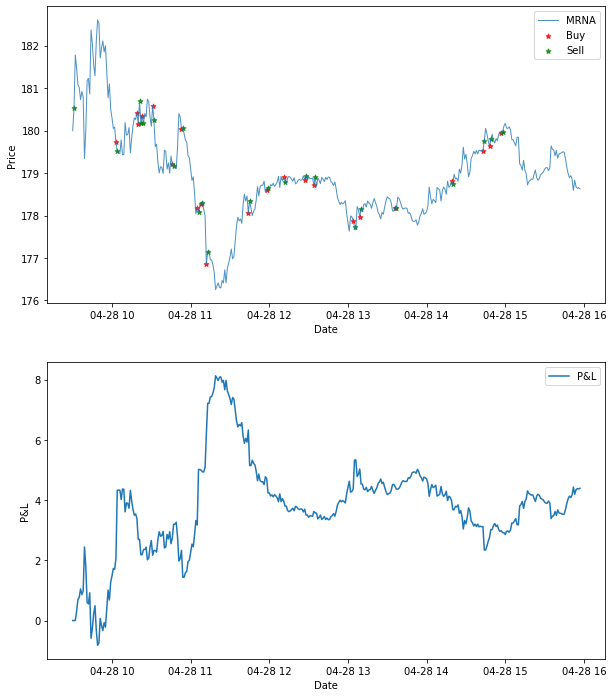

4.2057952880859375


In [ ]:
Test(mrna_df[780:], 'MRNA', 0.005, 'Model/actor_critic_jnj_2')

... loading models ...
# 0 action 0 pos: 0 reward: 0.000 balance: 0.000 pnl: 0.000
# 1 action 0 pos: 0 reward: 0.000 balance: 0.000 pnl: 0.000
# 2 action 0 pos: 0 reward: 0.000 balance: 0.000 pnl: 0.000
# 3 action 0 pos: 0 reward: 0.000 balance: 0.000 pnl: 0.000
# 4 action 0 pos: 0 reward: 0.000 balance: 0.000 pnl: 0.000
# 5 action 0 pos: 0 reward: 0.000 balance: 0.000 pnl: 0.000
# 6 action 1 pos: 0 reward: 0.000 balance: 0.000 pnl: 0.000
# 7 action 0 pos: -1 reward: 0.000 balance: 162.580 pnl: 0.000
# 8 action 0 pos: -1 reward: -0.210 balance: 162.580 pnl: -0.210
# 9 action 0 pos: -1 reward: -0.090 balance: 162.580 pnl: -0.090
# 10 action 0 pos: -1 reward: -0.050 balance: 162.580 pnl: -0.050
# 11 action 0 pos: -1 reward: -0.240 balance: 162.580 pnl: -0.240
# 12 action 0 pos: -1 reward: -0.340 balance: 162.580 pnl: -0.340
# 13 action 0 pos: -1 reward: -0.390 balance: 162.580 pnl: -0.390
# 14 action 0 pos: -1 reward: -0.580 balance: 162.580 pnl: -0.580
# 15 action 1 pos: -1 reward: -0.5

/content/drive/My Drive/Reinforcement Learning Project/Code/Train_Test.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['buy_mask'] = (action_record == 2)
/content/drive/My Drive/Reinforcement Learning Project/Code/Train_Test.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sell_mask'] = (action_record == 1)
/content/drive/My Drive/Reinforcement Learning Project/Code/Train_Test.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

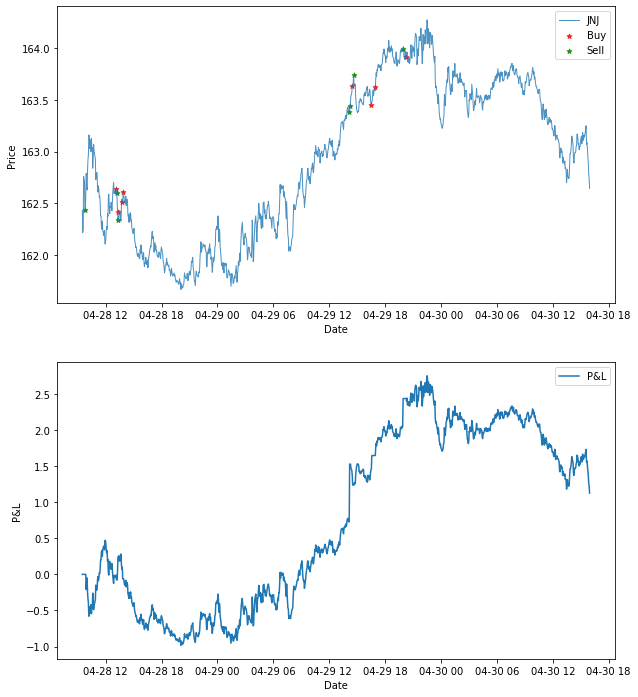

1.12060546875


In [ ]:
Test(jnj_df[780:], 'JNJ', 0.0005, 'Model/actor_critic_jnj')